# Семинар наставника, АБД

## НИУ ВШЭ, 2024-25 учебный год

# Домашнее задание 4. Библиотеки Matplotlib, Seaborn

Задание выполнил(а):

    Бажан Татьяна

## Общая информация

__Внимание!__  

Домашнее задание выполняется самостоятельно. Не допускается помощь в решении домашнего задания от однокурсников или третьих лиц. «Похожие» решения считаются плагиатом, и все задействованные студенты — в том числе и те, у кого списали, — не могут получить за него больше 0 баллов. Использование в решении домашнего задания генеративных моделей (ChatGPT и так далее) за рамками справочной и образовательной информации для генерации кода задания — считается плагиатом, и такое домашнее задание оценивается в 0 баллов.

Каждое задание весит 0.5 или 1 балл (указано рядом с номером задания). Всего в сумме можно получить, если правильно решить все задания, 10 баллов.

## Раздел 1. Визуализации в датасете кредитного скоринга

### О задании

Вы будете работать с задачей кредитного скоринга (оценка надёжности клиента). Предоставляются данные о 1000 клиентов, про которых известно около 20 признаков и положительная или отрицательная оценка в качестве кредитуемого. Эти данные нужно исследовать с помощью средств визуализации.

*Описание данных*:
https://www.rdocumentation.org/packages/evtree/versions/1.0-8/topics/GermanCredit

Каждый построенный график необходимо красиво оформить – для этого требуется как минимум указать его название, а также отметить, что изображено по каждой из осей.
Также по каждому графику ожидается небольшой комментарий с выводами.

*Функции, которые могут пригодиться при оформлении графиков: `.show()`, `.title()`, `.xlabel()`, `.ylabel()`*

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
GERMAN_CREDIT = 'https://github.com/evgpat/datasets/raw/refs/heads/main/german_credit.csv'
df = pd.read_csv(GERMAN_CREDIT)

In [5]:
df.head()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,no checking account,18,all credits at this bank paid back duly,car (used),1049,unknown/no savings account,< 1 yr,< 20,female : non-single or male : single,none,...,car or other,21,none,for free,1,skilled employee/official,0 to 2,no,no,good
1,no checking account,9,all credits at this bank paid back duly,others,2799,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,36,none,for free,2-3,skilled employee/official,3 or more,no,no,good
2,... < 0 DM,12,no credits taken/all credits paid back duly,retraining,841,... < 100 DM,4 <= ... < 7 yrs,25 <= ... < 35,female : non-single or male : single,none,...,unknown / no property,23,none,for free,1,unskilled - resident,0 to 2,no,no,good
3,no checking account,12,all credits at this bank paid back duly,others,2122,unknown/no savings account,1 <= ... < 4 yrs,20 <= ... < 25,male : married/widowed,none,...,unknown / no property,39,none,for free,2-3,unskilled - resident,3 or more,no,yes,good
4,no checking account,12,all credits at this bank paid back duly,others,2171,unknown/no savings account,1 <= ... < 4 yrs,< 20,male : married/widowed,none,...,car or other,38,bank,rent,2-3,unskilled - resident,0 to 2,no,yes,good


### Задание 1 (0.5 балла)

Используя `numpy` и `matplotlib`, начнём с тренировки: постройте график функций $sin(x)$ и $cos(x)$ на интервале от $-\pi$ до $\pi$, используя 100 точек. Добавьте легенду и сетку.. Используйте для линий разные цвета, одна из них пусть будет пунктирной. Результат в этом и следующих заданиях на построение графиков должен получиться примерно как на картинке. Содержание подписей не должно обязательно совпадать, однако осмысленные подписи должны присутствовать на графиках.

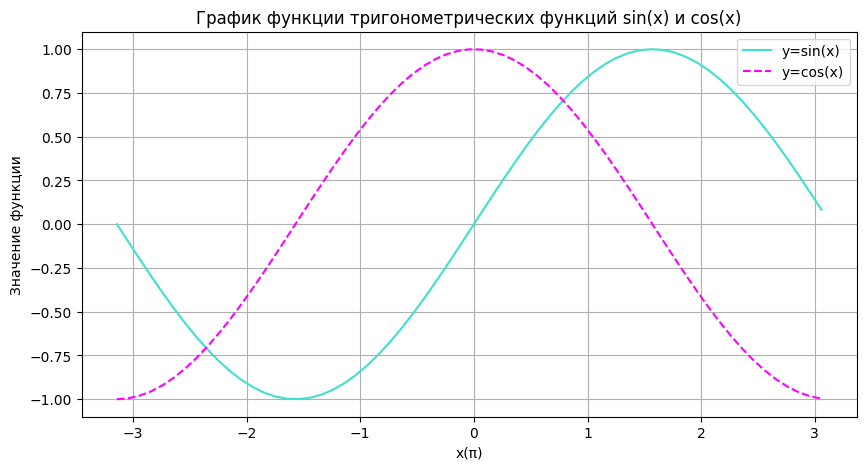

In [6]:
x = np.arange(-1 * np.pi, 1 * np.pi, 0.1)
y_sin = np.sin(x)
y_cos = np.cos(x)

plt.figure(figsize=(10, 5))
plt.plot(x, y_sin, color='turquoise', label='y=sin(x)')
plt.plot(x, y_cos, color='magenta', linestyle='--', label='y=cos(x)')
plt.title('График функции тригонометрических функций sin(x) и cos(x)')
plt.xlabel('x(π)')
plt.ylabel('Значение функции')
plt.legend()
plt.grid()
plt.show()

In [7]:
# то что должно получиться

### Задание 2 (0.5 балла)

Прочитайте средствами pandas файл с данными кредитного скоринга. Рассмотрите сравнительное количество положительных и отрицательных кейсов в зависимости от размера текущего счёта. Постройте зеркальные горизонтальные гистограммы.

In [8]:
group_df = df.groupby(['credit_risk', 'status']).size().reset_index()
group_df.rename(columns={0: 'count'}, inplace=True)

In [9]:
group_df

,credit_risk,status,count
0,bad,... < 0 DM,105
1,bad,... >= 200 DM / salary for at least 1 year,46
2,bad,0<= ... < 200 DM,14
3,bad,no checking account,135
4,good,... < 0 DM,164
5,good,... >= 200 DM / salary for at least 1 year,348
6,good,0<= ... < 200 DM,49
7,good,no checking account,139


In [10]:
good_df = group_df.query('credit_risk =="good"')
bad_df = group_df.query('credit_risk =="bad"')

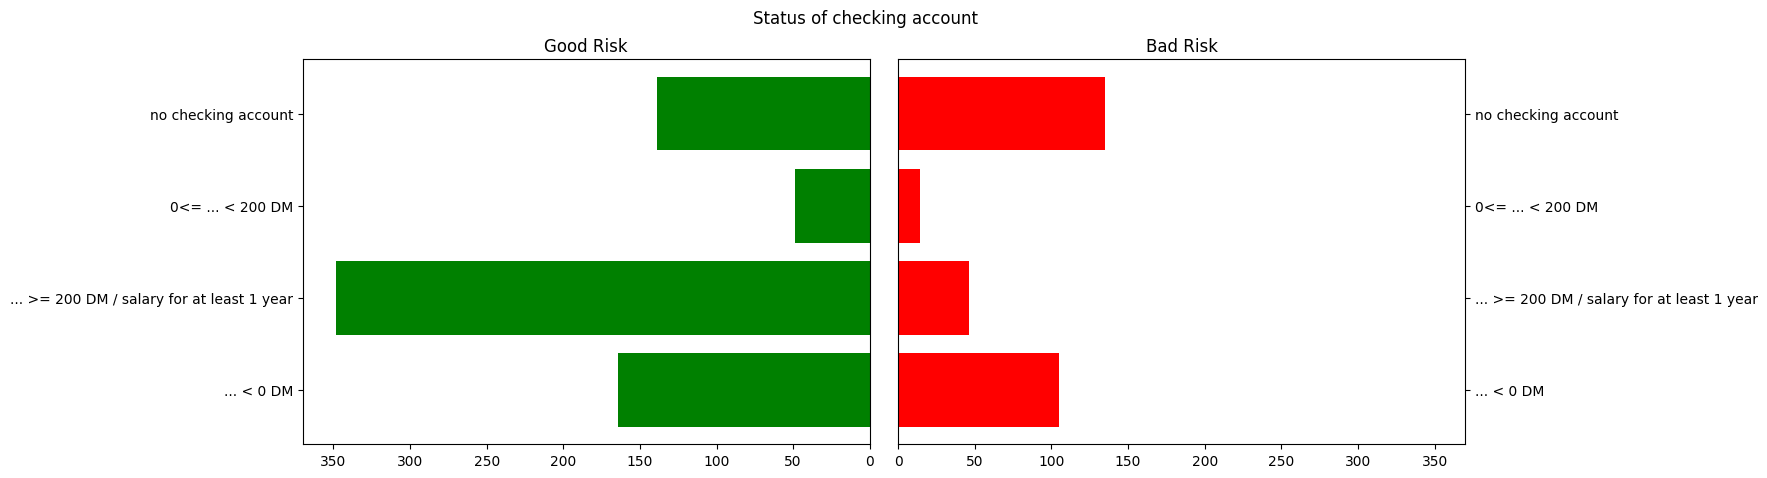

In [11]:
fig, axes = plt.subplots(1,2, figsize=(15, 5))

axes[0].barh(good_df['status'], good_df['count'], color='green')
axes[0].set_title('Good Risk')
axes[0].set_xlim(0, 370)
axes[0].invert_xaxis()


axes[1].barh(bad_df['status'], bad_df['count'], color='red')
axes[1].set_title('Bad Risk')
axes[1].yaxis.set_ticks_position('right')
axes[1].yaxis.tick_right()
axes[1].set_xlim(0, 370)

plt.subplots_adjust(wspace=0.05)
plt.suptitle('Status of checking account')
plt.show()

In [12]:
# то что должно получиться

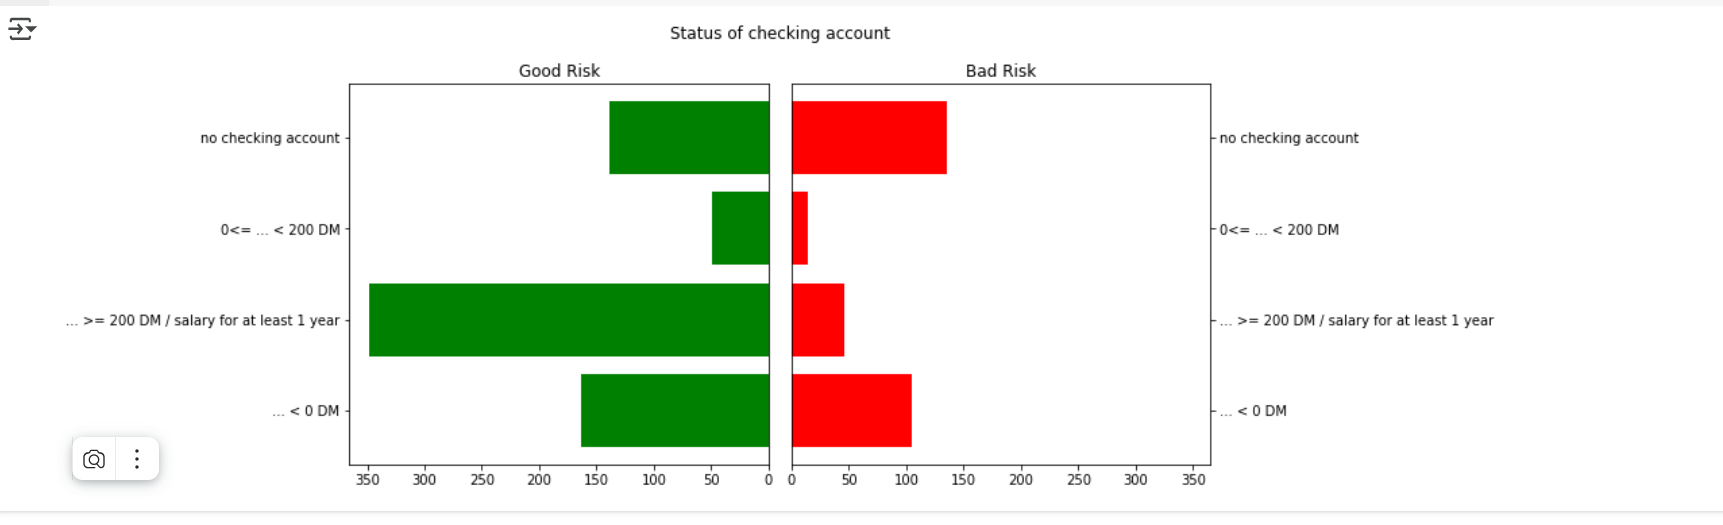

### Задание 3  (0.5 балла)

In [13]:
import seaborn as sns

Теперь постройте гистограмму для сравнения количества положительных и отрицательных кейсов в зависимости от размера сберегательного счёта с помощью seaborn. Какой способ вам больше нравится с точки зрения трудоёмкости написания кода? А с точки зрения восприятия результата?

In [14]:
# ваш код здесь
df_sav = df.groupby(['credit_risk', 'savings']).size().reset_index(name='count')
df_sav

,credit_risk,savings,count
0,bad,... < 100 DM,34
1,bad,... >= 1000 DM,32
2,bad,100 <= ... < 500 DM,11
3,bad,500 <= ... < 1000 DM,6
4,bad,unknown/no savings account,217
5,good,... < 100 DM,69
6,good,... >= 1000 DM,151
7,good,100 <= ... < 500 DM,52
8,good,500 <= ... < 1000 DM,42
9,good,unknown/no savings account,386


In [15]:
df_sav['savings'].unique()

array(['... <  100 DM', '... >= 1000 DM', '100 <= ... <  500 DM',
       '500 <= ... < 1000 DM', 'unknown/no savings account'], dtype=object)

In [16]:
savings_order = ['unknown/no savings account', '... <  100 DM', '100 <= ... <  500 DM', '500 <= ... < 1000 DM', '... >= 1000 DM']
df_sav['savings'] = pd.Categorical(df_sav['savings'], categories=savings_order, ordered=True)
df_sav = df_sav.sort_values(by='savings')

In [17]:
credit_risk_order = ['good', 'bad']
df_sav['credit_risk'] = pd.Categorical(df_sav['credit_risk'], categories=credit_risk_order, ordered=True)
df_sav = df_sav.sort_values(by='credit_risk')

In [18]:
df_sav

,credit_risk,savings,count
9,good,unknown/no savings account,386
5,good,... < 100 DM,69
7,good,100 <= ... < 500 DM,52
8,good,500 <= ... < 1000 DM,42
6,good,... >= 1000 DM,151
4,bad,unknown/no savings account,217
0,bad,... < 100 DM,34
2,bad,100 <= ... < 500 DM,11
3,bad,500 <= ... < 1000 DM,6
1,bad,... >= 1000 DM,32


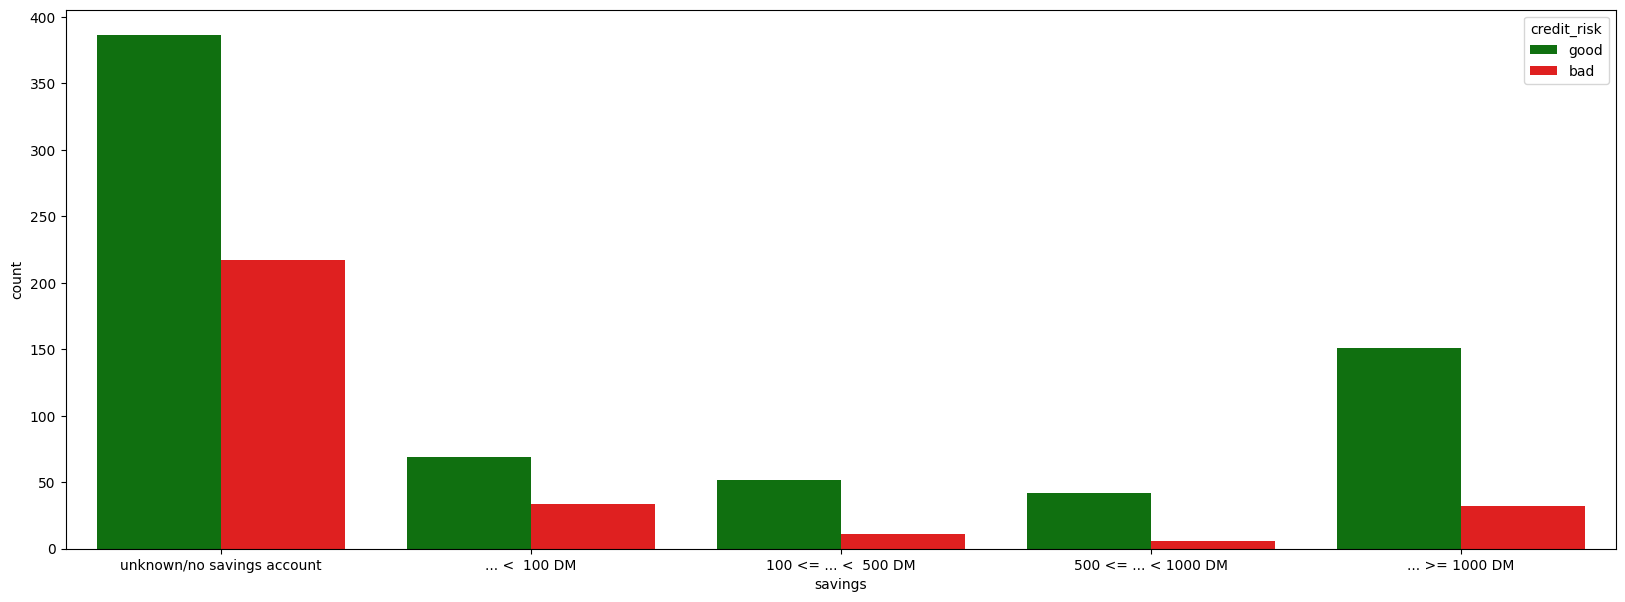

In [19]:
plt.figure(figsize=(20, 7))
sns.barplot(data=df_sav, x='savings', y='count', hue='credit_risk', palette={'good': 'green', 'bad': 'red'})
plt.legend(title='credit_risk')
plt.show()

In [20]:
# то что должно получиться

### Задание 4  (0.5 балла)

seaborn легко позволяет добавить ещё больше информации на один график. Для каждого размера сберегательного счёта мы можем оценить не только количество положительных и отрицательных кейсов, но и их распределение по возрасту, например. Постройте подходящую для этого визуализацию.

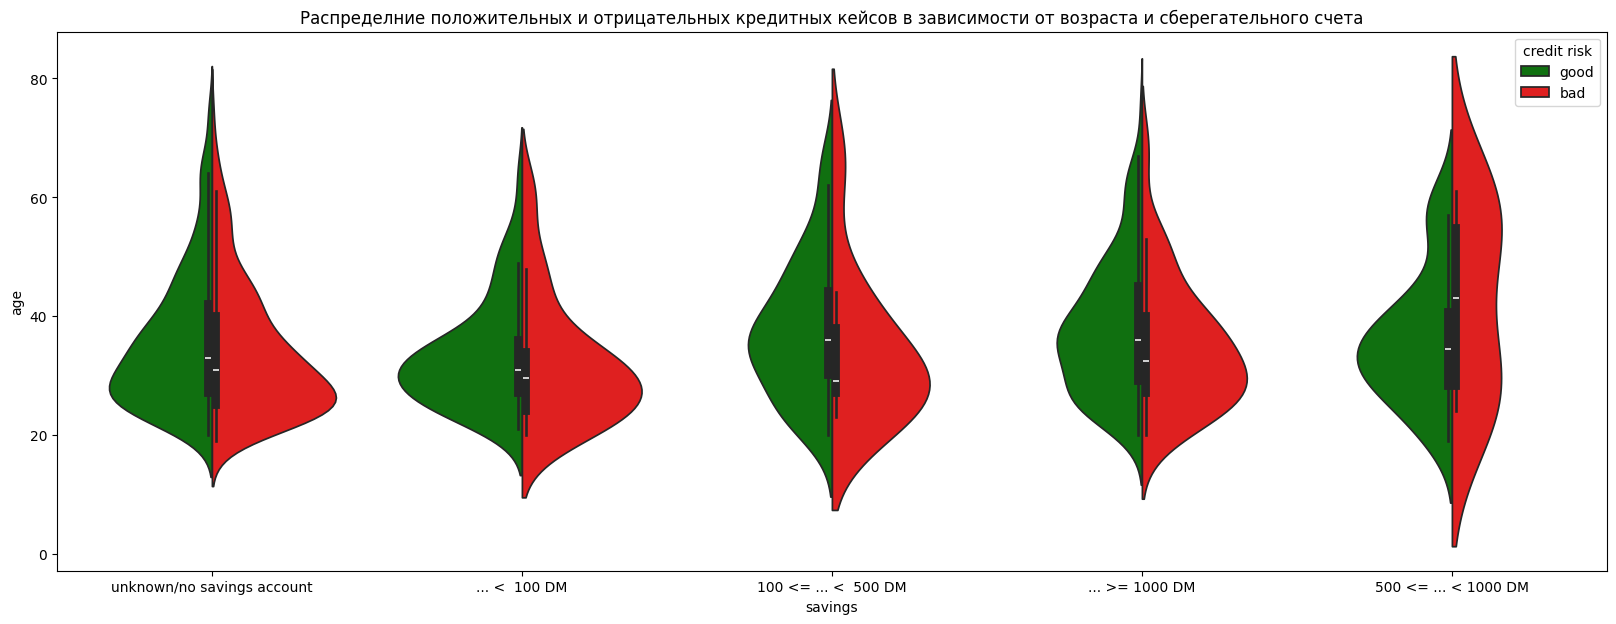

In [21]:
# ваш код здесь
plt.figure(figsize=(20, 7))
sns.violinplot(x='savings', y='age', data=df, hue='credit_risk', split=True, palette={'good': 'green', 'bad': 'red'});
plt.title('Распределние положительных и отрицательных кредитных кейсов в зависимости от возраста и сберегательного счета')
plt.legend(title='credit risk')
plt.show()

In [22]:
# то что должно получиться

### Задание 5  (0.5 балла)

Заканчивая с гистограммами, посмотрим на распределение положительных и отрицательных кейсов по возрастам, разместив их друг над другом. Добавим распределение всех взятых кредитов.

In [23]:
good_credit_risk = df.query('credit_risk == "good"')
bad_credit_risk = df.query('credit_risk == "bad"')

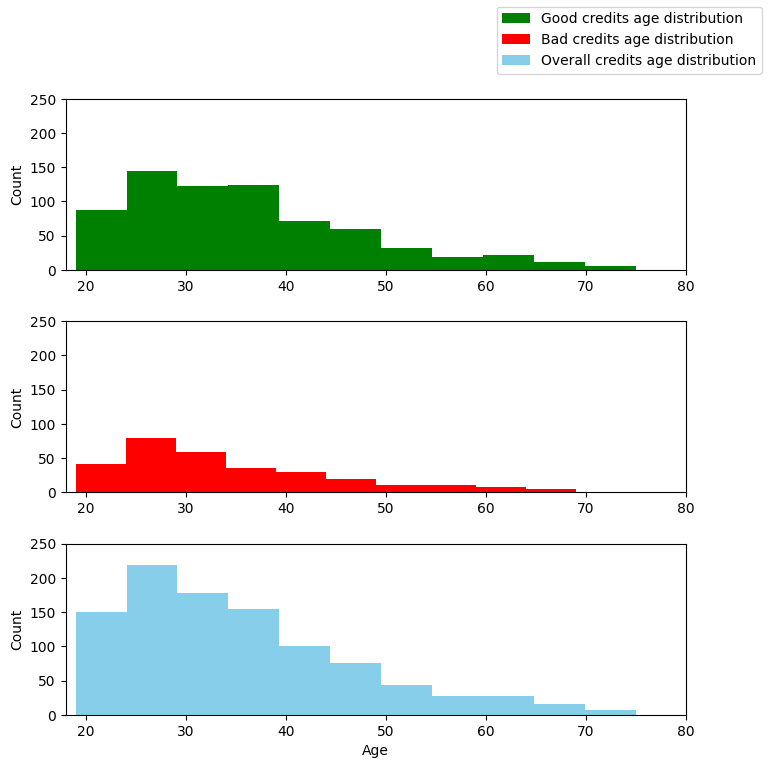

In [24]:
# ваш код здесь
fig, axes = plt.subplots(3,1, figsize=(8, 8))

axes[0].hist(data = good_credit_risk, x = 'age', bins=11, color='green', label = 'Good credits age distribution')
axes[0].set_xlim(18,80)
axes[0].set_ylim(0,250)
axes[0].set_ylabel('Count')


axes[1].hist(data = bad_credit_risk, x = 'age', bins=11, color='red', label = 'Bad credits age distribution')
axes[1].set_xlim(18,80)
axes[1].set_ylim(0,250)
axes[1].set_ylabel('Count')

axes[2].hist(data = df, x = 'age', bins=11, color='skyblue', label = 'Overall credits age distribution')
axes[2].set_xlim(18,80)
axes[2].set_ylim(0,250)
axes[2].set_xlabel('Age')
axes[2].set_ylabel('Count')


plt.subplots_adjust(hspace=0.3)
plt.figlegend()
plt.show()

In [25]:
# то что должно получиться

### Задание 6  (0.5 балла)

Не менее полезной иногда может быть диаграмма рассеяния. Постройте такую диаграмму с продолжительностью и размерами кредитов в качестве осей. Обозначьте положительные и отрицательные кейсы разными цветами.

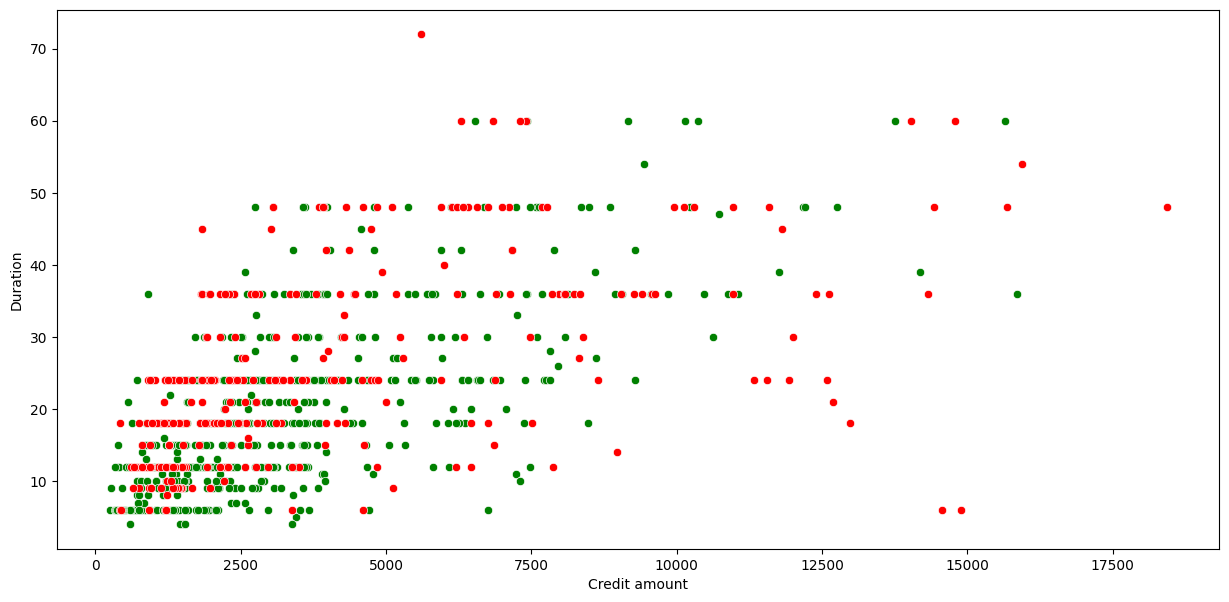

In [26]:
# ваш код здесь
plt.figure(figsize=(15, 7))

sns.scatterplot(x = good_credit_risk['amount'], y = good_credit_risk['duration'], color='green')
sns.scatterplot(x = bad_credit_risk['amount'], y = bad_credit_risk['duration'], color='red')

plt.xlabel('Credit amount')
plt.ylabel('Duration')
plt.show()

In [27]:
# то что должно получиться

### Задание 7  (0.5 балла)

Продвинемся глубже. Постройте 3D версию диаграммы рассеяния, добавив ось с возрастом.

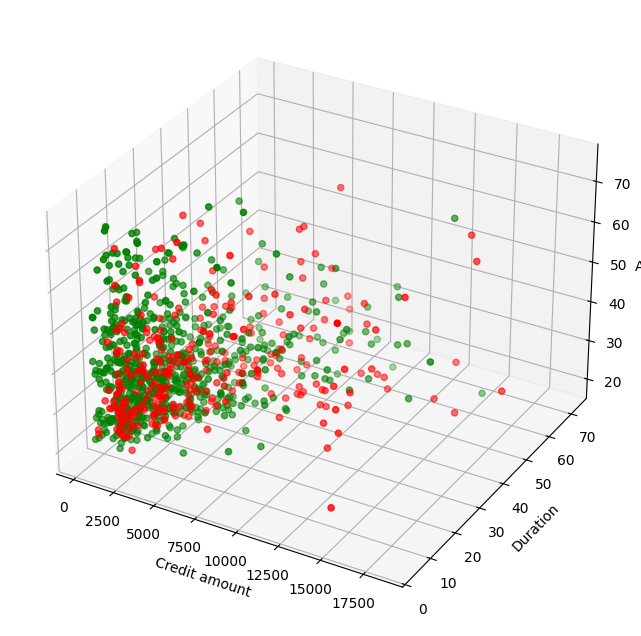

In [28]:
# ваш код здесь
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(xs = good_credit_risk['amount'], ys = good_credit_risk['duration'], zs = good_credit_risk['age'], color='green')
ax.scatter(xs = bad_credit_risk['amount'], ys = bad_credit_risk['duration'], zs = bad_credit_risk['age'], color='red')

ax.set_xlabel('Credit amount')
ax.set_ylabel('Duration')
ax.set_zlabel('Age')

plt.show()

In [29]:
# то что должно получиться

Что вы можете сказать о сравнении 3D- и 2D-визуализаций? Какие вы видите в них преимущества и недостатки?

Какие выводы с точки зрения бизнеса можно сделать из полученного графика?

График в 3D визуализации показывает больше информации про взаимосвязь переменных в датафрейме, поскольку для его построения задействовано больше данных.

Преимущества:
- больше информации = > можно сделать юольше выводов
- взаимосвязь всех трех переменных сразу, а не попарно каждые отдельно
-
Недостатки:
- лишняя информация, если для исследования нет необходимости изучать, как влияет третий параметр(в данном случае возраст) на исследование

Вывод: клиенты с хорошим кредитным рейтингом чаще берут кредит от 0 до 7500 в возрасте от 18 до 50 лет

## Раздел 2. Визуализации в датасете Netflix

В данном разделе вы продолжите практиковаться в визуализациях и поработаете с более сложными графиками и инструментами.

Все технические рекомендации остаются неизменными с прошлого раздела.

In [30]:
NETFLIX_TITLES = 'https://github.com/evgpat/datasets/raw/refs/heads/main/netflix_titles.csv'
data = pd.read_csv(NETFLIX_TITLES)

### Задание 1  (0.5 балла)

Прочитайте средствами pandas файл с данными Netflix. Посчитайте количество пропусков (NaN) в колонке `director`. Постройте столбчатую диаграмму, которая показывает 5 стран, в которых наибольшее количество фильмов содержат пропуски в столбце `director`.

Добавьте на диаграмму:

- Заголовок жирным шрифтом
- Подписи осей

In [31]:
# ваш код здесь
data.isnull().sum()

,0
show_id,0
type,0
title,0
director,2389
cast,718
country,507
date_added,10
release_year,0
rating,7
duration,0


In [32]:
director_isnull = data['director'].isnull().sum()
director_isnull

2389

In [68]:
country_director_isnull = data[data['director'].isnull()]['country'].value_counts().reset_index()
country_director_isnull['country'] = country_director_isnull['country'].str.split(',')
country_director_isnull = country_director_isnull.explode('country')
country_director_isnull = country_director_isnull.sort_values(by = 'count', ascending = False)
country_director_isnull

,country,count
0,United States,711
1,United Kingdom,195
2,Japan,147
3,South Korea,139
4,India,75
...,...,...
104,United States,1
104,United Kingdom,1
105,United Arab Emirates,1
106,Croatia,1


In [69]:
top_5_country_null = country_director_isnull.head()
top_5_country_null

,country,count
0,United States,711
1,United Kingdom,195
2,Japan,147
3,South Korea,139
4,India,75


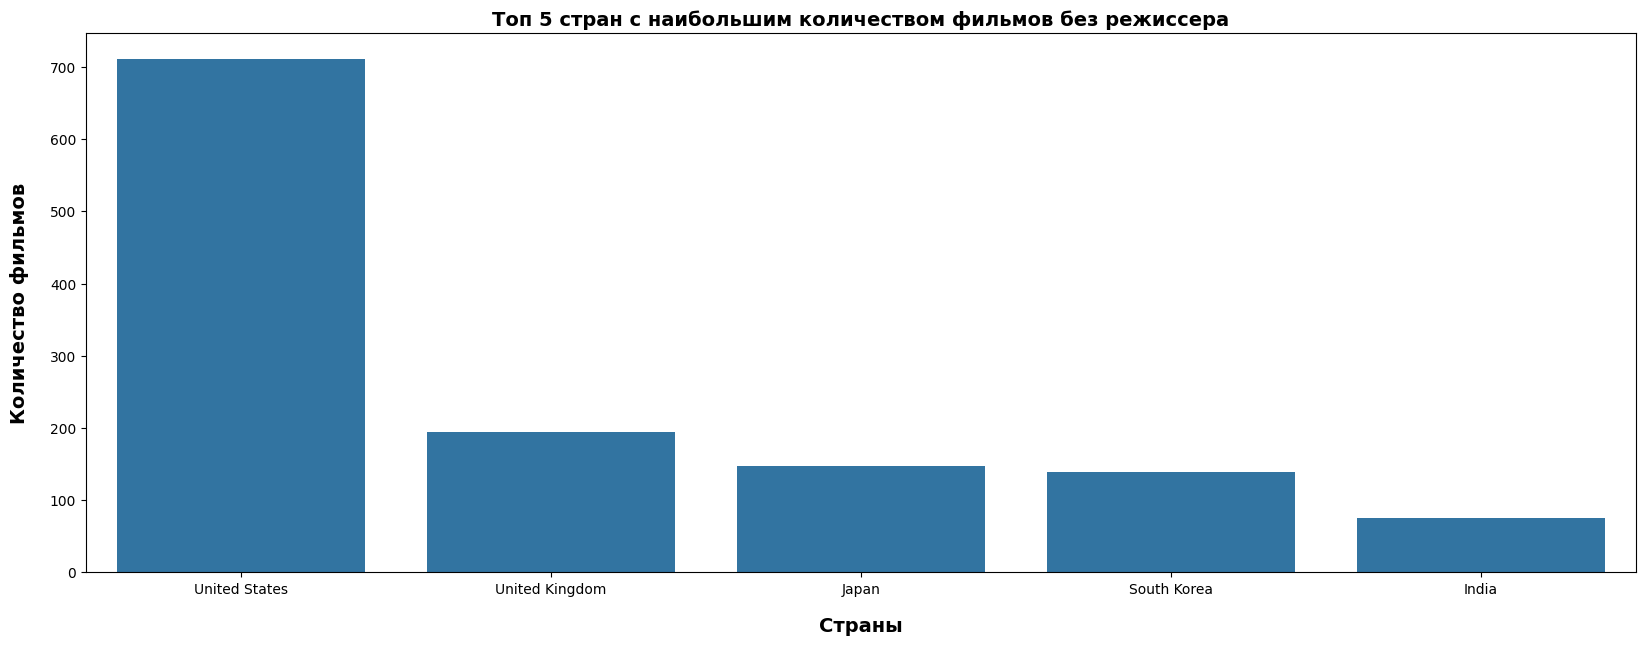

In [70]:
plt.figure(figsize=(20, 7))
sns.barplot(data=top_5_country_null, x='country', y='count')

plt.title('Топ 5 стран с наибольшим количеством фильмов без режиссера', fontsize=14, fontweight='bold')
plt.xlabel('Страны', fontsize=14, fontweight='bold', labelpad=15)
plt.ylabel('Количество фильмов', fontsize=14, fontweight='bold', labelpad=15)
plt.show()

### Задание 2 (0.5 балла)

Постройте pie chart (круговую диаграмму), показывающую 5 стран, в которых произвели больше всего фильмов.

Добавьте на диаграмму:

+ Заголовок (Тип шрифта: ``family = 'monospace'``, насыщенность: ``fontweight='bold'``)
+ Название стран (Тип шрифта: ``family = 'monospace'``)
+ Подписи значений (%) (Тип шрифта: ``family = 'monospace'``)
+ Выберите стиль для диаграммы pastel c помощью библиотеки ``seaborn``

```colors = sns.color_palette('pastel')[0:5]```

In [73]:
country_movies_count = data['country'].value_counts().reset_index()
country_movies_count['country'] = country_movies_count['country'].str.split(',')
country_movies_count = country_movies_count.explode('country')
country_movies_count = country_movies_count.sort_values(by = 'count', ascending = False)
top_5_country_movies_count = country_movies_count.head()

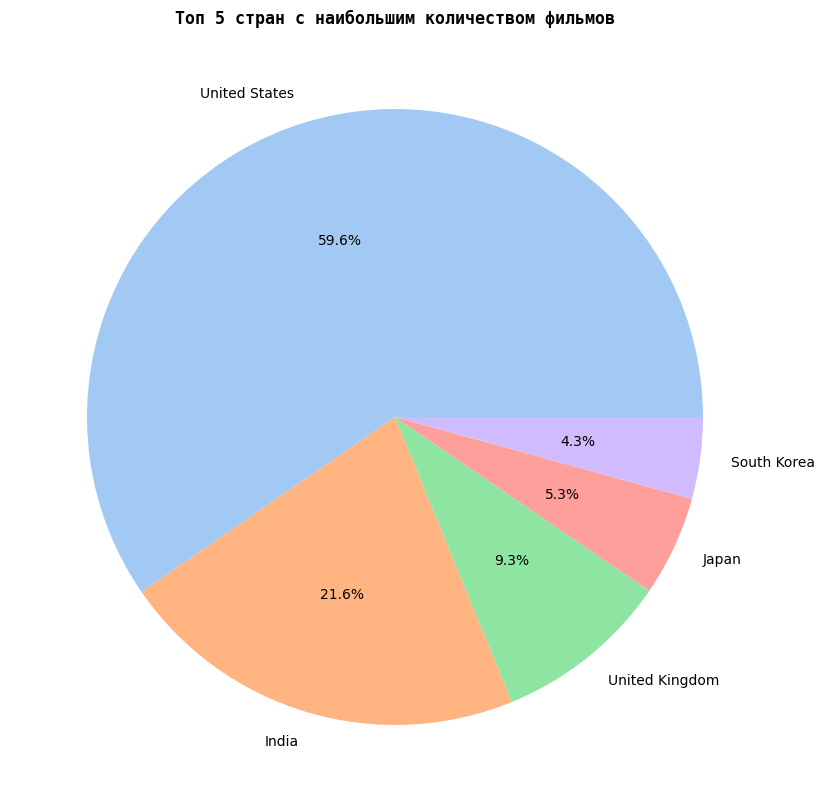

In [74]:
# ваш код здесь
plt.figure(figsize=(10, 10))
plt.pie(top_5_country_movies_count['count'], labels= top_5_country_movies_count['country'], colors = sns.color_palette('pastel'), autopct='%1.1f%%')

plt.title('Топ 5 стран с наибольшим количеством фильмов', fontfamily='monospace', fontweight='bold')
plt.xticks(fontfamily='monospace')
plt.show()

### Задание 3 (1 балл)

Постройте subplots, где на первом графике будет круговая диаграмма, показывающая долю фильмов каждого рейтинга *(rating)*, а на втором столбчатая диаграмма, показывающая 3 страны, в которых было снято больше всего фильмов с рейтингом TV-MA.

*Если фильмов в каких-то рейтингах меньше 50, то их в график брать не нужно.*

Добавьте на диаграммы:

+ Заголовки (можно жирным)

Круговая диаграмма:
+ Подписи значений абсолютные

Столбчатая диаграммма:
+ Сделайте так, чтобы ось Y была справа
+ Добавьте подпись «Количество фильмов» к оси Y и уберите подпись к оси X
+ Оставьте видимыми только правую и нижнюю границы

In [75]:
rating_count = data['rating'].count()
rating_count

7770

In [76]:
rating_value_counts = data['rating'].value_counts().reset_index()
rating_value_counts

,rating,count
0,TV-MA,2861
1,TV-14,1928
2,TV-PG,804
3,R,665
4,PG-13,386
5,TV-Y,279
6,TV-Y7,270
7,PG,247
8,TV-G,194
9,NR,83


In [77]:
rating_value_counts = rating_value_counts.query('count >= 50')

In [78]:
rating_TV_MA = data.query('rating == "TV-MA"')
rating_TV_MA_count = rating_TV_MA.groupby('country').size().reset_index(name='count')
rating_TV_MA_count = rating_TV_MA_count.sort_values(by = 'count', ascending = False)
rating_TV_MA_count

,country,count
252,United States,879
89,India,228
218,United Kingdom,167
185,Spain,109
181,South Korea,83
...,...,...
117,"Jamaica, United States",1
120,Jordan,1
121,Kenya,1
122,Kuwait,1


In [79]:
top_3_rating_TV_MA = rating_TV_MA_count.head(3)
top_3_rating_TV_MA

,country,count
252,United States,879
89,India,228
218,United Kingdom,167


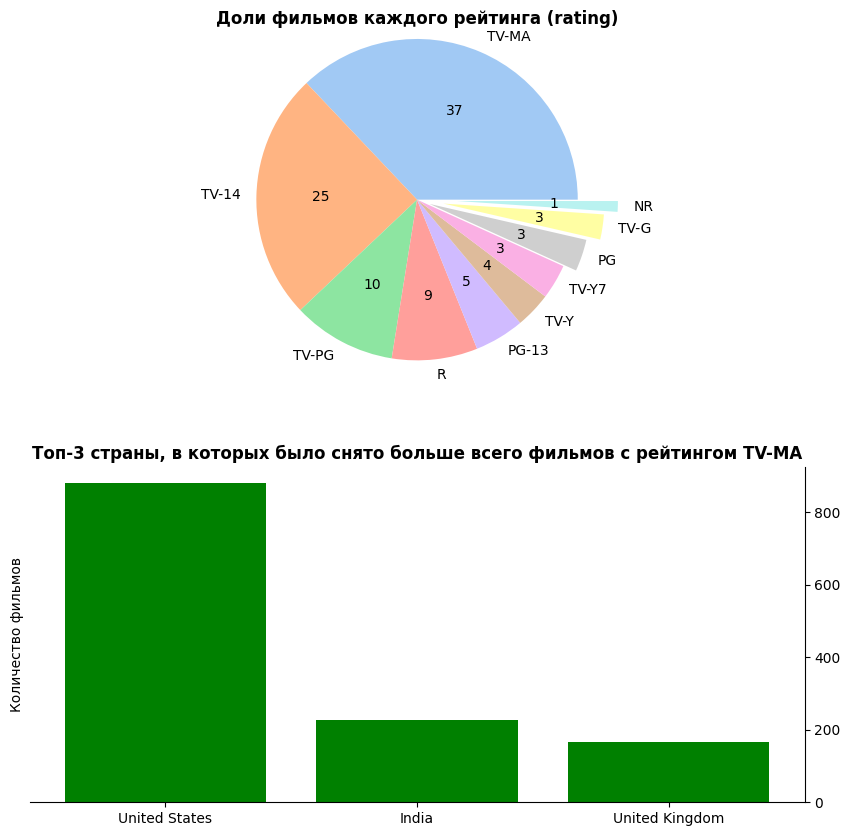

In [80]:
fig, axes = plt.subplots(2,1, figsize=(10, 10))

axes[0].pie(rating_value_counts['count'], labels= rating_value_counts['rating'], colors = sns.color_palette('pastel'), autopct='%1.0f', explode=(0, 0, 0, 0, 0, 0, 0, 0.1 , 0.2, 0.3), radius = 1.2)
axes[0].set_title('Доли фильмов каждого рейтинга (rating)', fontweight='bold')

axes[1].bar(data = top_3_rating_TV_MA, x = 'country', height = 'count', color = 'green')
axes[1].set_title('Топ-3 страны, в которых было снято больше всего фильмов с рейтингом TV-MA', fontweight='bold')
axes[1].set_ylabel('Количество фильмов')
axes[1].spines['top'].set_visible(False)
axes[1].spines['left'].set_visible(False)
axes[1].yaxis.tick_right()

plt.subplots_adjust(hspace=0.3)
plt.show()

### Задание 4 (1 балл)

Преобразуйте колонку `date_added` в datetime. Создайте новые столбцы month и year из преобразованного столбца. Постройте линейный график: сколько в среднем фильмов было снято в каждый из месяцев.

Добавьте на график:

+ Заголовок жирным шрифтом
+ Подписи осей
+ Маркеры на точках перегиба
+ Настройте ось X: ось начинается с 1 заканчивается 12, шаг 1

In [84]:
# ваш код здесь
data['date_added'] = pd.to_datetime(data['date_added'])

In [85]:
data['month'] = data['date_added'].dt.month
data = data.dropna(subset=['month'])
data['month'] = data['month'].astype(int)

In [86]:
data['year'] = data['date_added'].dt.year
data = data.dropna(subset=['year'])
data['year'] = data['year'].astype(int)

In [87]:
data_films_month = data.groupby(['year', 'month']).size().reset_index(name='count')

In [88]:
data_films_month_mean = data_films_month.groupby('month').mean().reset_index()
data_films_month_mean['year'] = data_films_month_mean['year'].astype(int)
data_films_month_mean

,month,year,count
0,1,2016,84.111111
1,2,2015,52.444444
2,3,2016,95.571429
3,4,2017,85.857143
4,5,2015,67.875000
5,6,2017,77.428571
6,7,2017,85.714286
7,8,2016,77.250000
8,9,2015,68.777778
9,10,2015,87.222222


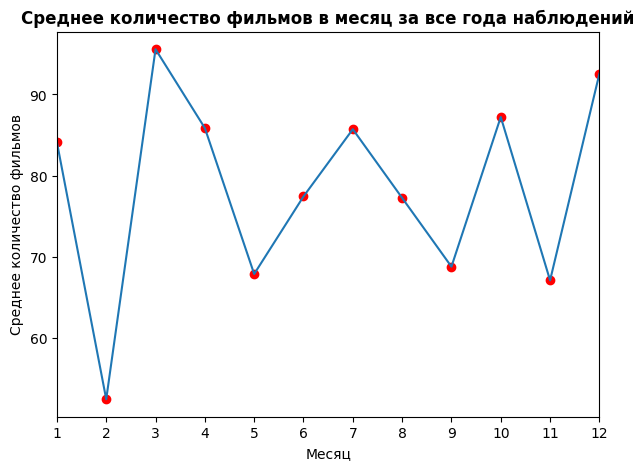

In [89]:
plt.figure(figsize=(7, 5))
sns.lineplot(data = data_films_month_mean, x = data_films_month_mean['month'], y = data_films_month_mean['count'])
plt.scatter(data_films_month_mean['month'], data_films_month_mean['count'], color='red', marker='o')
plt.title('Среднее количество фильмов в месяц за все года наблюдений', fontweight='bold')
plt.xlabel('Месяц')
plt.ylabel('Среднее количество фильмов')
plt.xlim(1, 12)
plt.xticks(range(1, 13))
plt.show()

### Задание 5 (1 балл)

Постройте линейный график, в какие годы (столбец year, который вы создали в задании 4) сколько фильмов было снято.

Добавьте на график:

+ Заголовок жирным шрифтом
+ Подписи осей
+ Измените цвет линии графика и сделайте ее пунктиром
+ Решетку на фон

In [90]:
# ваш код здесь
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month,year,seasons,min
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,8,2020,4,None
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,12,2016,None,93
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",12,2018,None,78
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",11,2017,None,80
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,1,2020,None,123


In [91]:
data_films_year = data.groupby('year').size().reset_index(name='count')

In [92]:
data_films_year

,year,count
0,2008,2
1,2009,2
2,2010,1
3,2011,13
4,2012,3
5,2013,11
6,2014,25
7,2015,88
8,2016,443
9,2017,1225


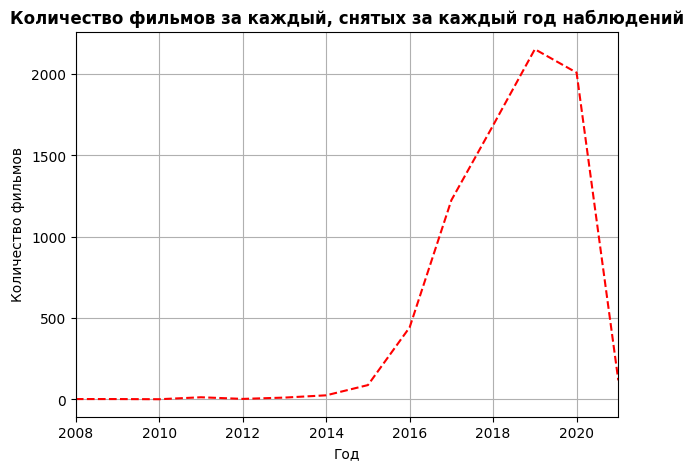

In [93]:
plt.figure(figsize=(7, 5))
sns.lineplot(data = data_films_year, x = data_films_year['year'], y = data_films_year['count'], color='red', linestyle='--')
plt.title('Количество фильмов за каждый, снятых за каждый год наблюдений', fontweight='bold')
plt.xlabel('Год')
plt.ylabel('Количество фильмов')
plt.xlim(2008, 2021)
plt.grid()
plt.show()

### Задание 6 (1 балл)

Будем работать со столбцом duration. Одни данные даны в минутах (для фильмов (Movie)), а другие в сезонах (для сериалов (TV shows)). Создайте два новых столбца min (для тех, у кого продолжительность в минутах) и season (для тех, у кого продолжительность в сезонах), в которых будут извлечены данные из столбца duration.

Постройте subplots, где на первом графике гистрограмма распределения продолжительности фильмов, а на втором – гистрограмма распределения продолжительности сериалов.

Добавьте на графики:

+ Заголовки жирным шрифтом
+ Подписи осей

In [94]:
data['seasons'] = data['duration'].apply(lambda x: x.replace(' Seasons', '') if 'Seasons' in x else None)
data['min'] = data['duration'].apply(lambda x: x.replace(' min', '') if 'min' in x else None)

In [95]:
data_min = data.query('min != "None"')
data_min = data_min.dropna(subset=['min'])
data_min = data_min.drop('seasons', axis=1)
data_min['min'] = data_min['min'].astype(int)

In [96]:
data_min.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month,year,min
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,12,2016,93
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",12,2018,78
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",11,2017,80
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,1,2020,123
6,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,2020-06-01,2019,TV-MA,95 min,"Horror Movies, International Movies","After an awful accident, a couple admitted to ...",6,2020,95


In [97]:
data_min['min'].describe()

,min
count,5377.000000
mean,99.307978
std,28.530881
min,3.000000
25%,86.000000
50%,98.000000
75%,114.000000
max,312.000000


In [98]:
data_seasons = data.query('seasons != "None"')
data_seasons = data_seasons.dropna(subset=['seasons'])
data_seasons = data_seasons.drop('min', axis=1)
data_seasons['seasons'] = data_seasons['seasons'].astype(int)
data_seasons = data_seasons.sort_values(by='seasons')

In [99]:
data_seasons.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month,year,seasons
3968,s3969,TV Show,Marvel's Luke Cage,NaN,"Mike Colter, Alfre Woodard, Rosario Dawson, Si...",United States,2018-06-22,2018,TV-MA,2 Seasons,"Crime TV Shows, TV Action & Adventure, TV Dramas","A hoodie-wearing, unbreakable ex-con fights to...",6,2018,2
4402,s4403,TV Show,Narcos: Mexico,NaN,"Michael Peña, Diego Luna, Tenoch Huerta, Joaqu...","Mexico, United States",2020-02-13,2020,TV-MA,2 Seasons,"Crime TV Shows, TV Action & Adventure, TV Dramas",Witness the birth of the Mexican drug war in t...,2,2020,2
4389,s4390,TV Show,Nailed It! Holiday!,NaN,"Nicole Byer, Jacques Torres",United States,2019-11-22,2019,TV-PG,2 Seasons,Reality TV,"It's the ""Nailed It!"" holiday special you've b...",11,2019,2
4371,s4372,TV Show,Mystery Science Theater 3000: The Return,NaN,"Felicia Day, Patton Oswalt, Jonah Ray, Baron V...",United States,2018-11-22,2018,TV-14,2 Seasons,"TV Comedies, TV Sci-Fi & Fantasy",The cult hit returns! Captured by mad scientis...,11,2018,2
4317,s4318,TV Show,My First First Love,NaN,"Ji Soo, Jung Chae-yeon, Jinyoung, Choi Ri, Kan...",South Korea,2019-07-26,2019,TV-14,2 Seasons,"International TV Shows, Korean TV Shows, Roman...","Due to various personal reasons, a group of Yu...",7,2019,2


In [100]:
data_seasons['seasons'].describe()

,seasons
count,792.000000
mean,3.305556
std,1.954623
min,2.000000
25%,2.000000
50%,3.000000
75%,4.000000
max,16.000000


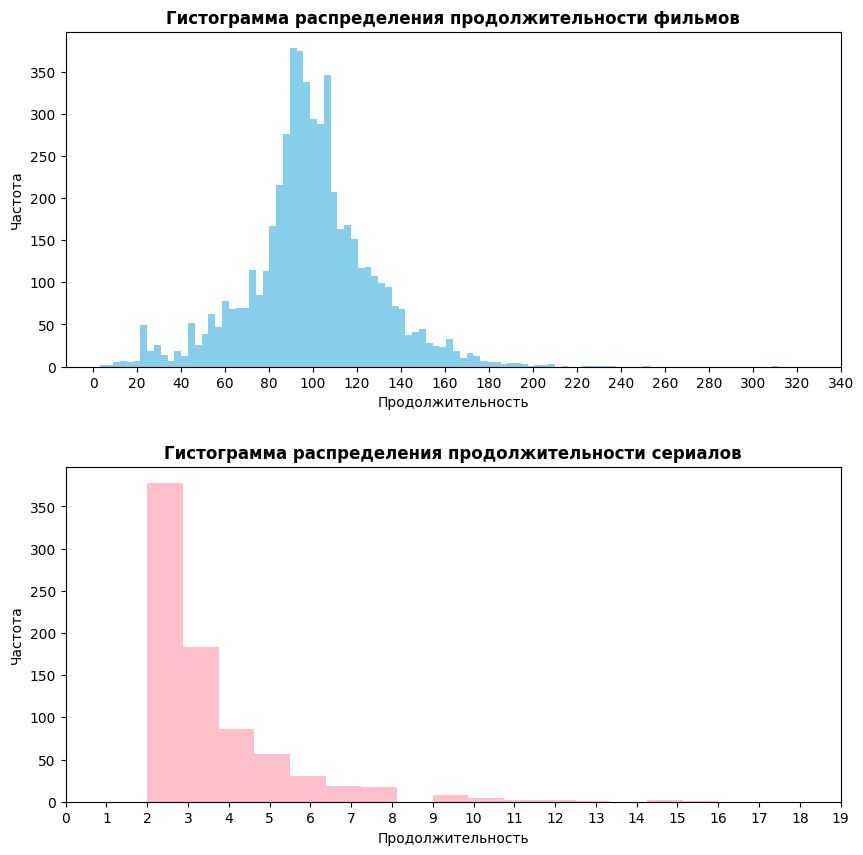

In [101]:
fig, axes = plt.subplots(2,1, figsize=(10, 10))

axes[0].hist(data_min['min'], bins=100, color='skyblue')
axes[0].set_xlabel('Продолжительность')
axes[0].set_ylabel('Частота')
axes[0].set_title('Гистограмма распределения продолжительности фильмов', fontweight='bold')
axes[0].set_xticks(range(0, 350, 20))


axes[1].hist(data_seasons['seasons'].dropna(), bins=16, color='pink')
axes[1].set_xlabel('Продолжительность')
axes[1].set_ylabel('Частота')
axes[1].set_title('Гистограмма распределения продолжительности сериалов', fontweight='bold')
axes[1].set_xticks(range(0, 20, 1))

plt.subplots_adjust(hspace=0.3)
plt.show()

### Задание 7 (0.5 балла)

Постройте ящик с усами (box plot) по продолжительности фильмов (Movies). Визуально проинтерпретируйте его.

In [102]:
# ваш код здесь
movie = data_min.query('type == "Movie"')
movie.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month,year,min
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,12,2016,93
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",12,2018,78
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",11,2017,80
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,1,2020,123
6,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,2020-06-01,2019,TV-MA,95 min,"Horror Movies, International Movies","After an awful accident, a couple admitted to ...",6,2020,95


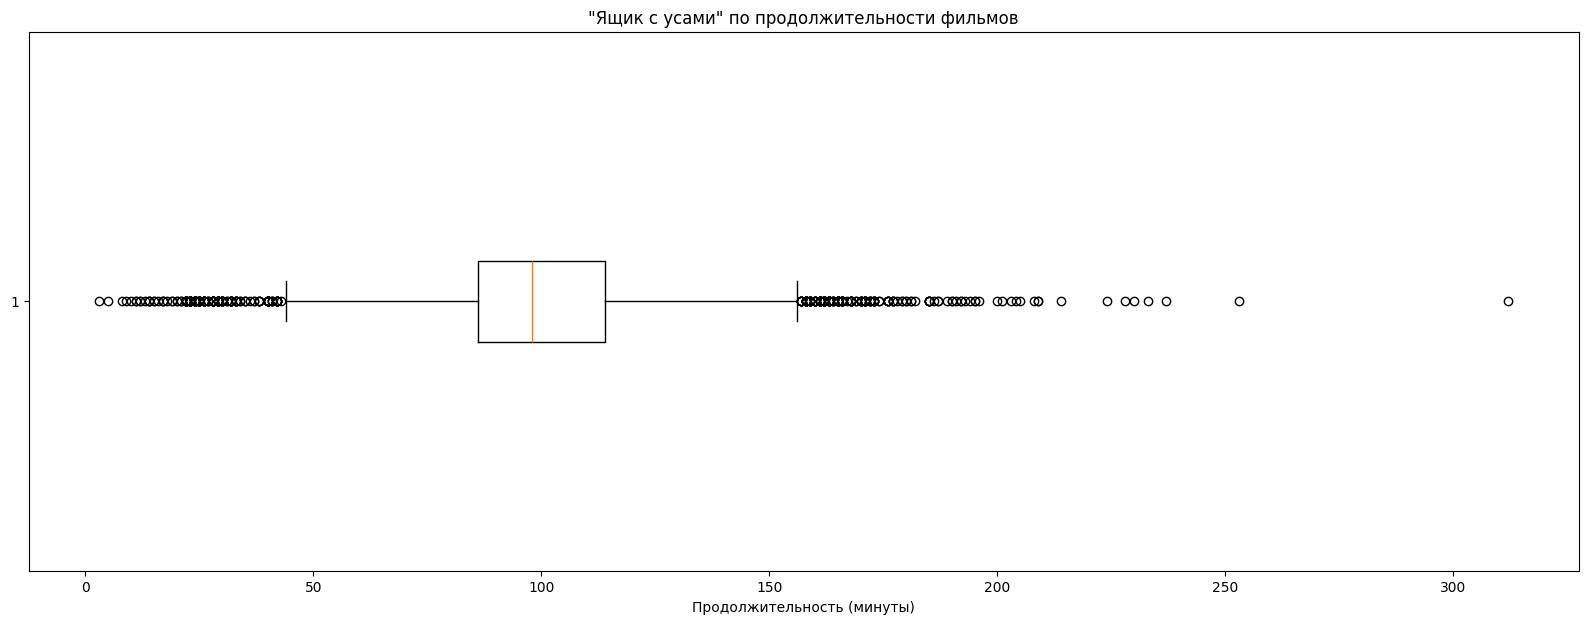

In [103]:
plt.figure(figsize=(20, 7))
plt.boxplot(movie['min'], vert=False)
plt.title('"Ящик с усами" по продолжительности фильмов')
plt.xlabel('Продолжительность (минуты)')
plt.show()

### Задание 8* (1 балл)

Постройте при помощи библиотеки plotly интерактивную столбчатую диаграмму, которая сравнивает среднюю продолжительность фильмов и сериалов за каждый год, начиная с 2000.

In [123]:
# ваш код здесь
import plotly.graph_objects as go

In [111]:
data_movie = movie.query('year >=2000')

In [112]:
data_show = data_seasons.query('year >=2000')

In [118]:
mean_data_movie = data_movie.groupby('year')['min'].mean().reset_index()
mean_data_show = data_show.groupby('year')['seasons'].mean().reset_index()

In [119]:
mean_data_movie

,year,min
0,2008,81.000000
1,2009,66.500000
2,2010,84.000000
3,2011,93.461538
4,2012,62.000000
5,2013,83.500000
6,2014,77.000000
7,2015,82.758621
8,2016,83.879845
9,2017,95.833333


In [120]:
mean_data_show

,year,seasons
0,2013,5.000000
1,2014,4.666667
2,2015,4.437500
3,2016,3.268293
4,2017,3.446602
5,2018,3.370079
6,2019,2.966507
7,2020,3.378182
8,2021,3.166667


In [127]:
fig = go.Figure()

fig.add_trace(go.Bar(x=mean_data_movie['year'],y=mean_data_movie['min'],name='Фильмы',marker_color='skyblue'))
fig.add_trace(go.Bar(x=mean_data_show['year'],y=mean_data_show['seasons'],name='Сериалы',marker_color='pink'))

fig.update_layout(title='Средняя продолжительность фильмов и сериалов с 2000 года',xaxis_title='Год',yaxis_title='Средняя продолжительность (мин)',barmode='group')
fig.show()